In [ ]:
"""
Possible examples of how to query a graph: 

# does edge and node querying
https://gist.github.com/aanastasiou/5474ba76db711971b6e8

How to look for sugraphs: DotMotif

Reminder: eval will return true and false that can index into dataframe

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import networkx as nx

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")
import datajoint_utils as du
import system_utils as su

INFO - 2021-06-14 15:57:05,439 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-14 15:57:05,442 - settings - Setting database.user to celiib
INFO - 2021-06-14 15:57:05,443 - settings - Setting database.password to newceliipass
INFO - 2021-06-14 15:57:05,444 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-14 15:57:05,445 - settings - Setting database.user to celiib
INFO - 2021-06-14 15:57:05,446 - settings - Setting database.password to newceliipass
INFO - 2021-06-14 15:57:05,451 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/de

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-06-14 15:57:06,005 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-14 15:57:06,049 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-14 15:57:06,050 - settings - Setting database.user to celiib
INFO - 2021-06-14 15:57:06,051 - settings - Setting database.password to newceliipass
INFO - 2021-06-14 15:57:06,052 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-14 15:57:06,615 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-14 15:57:06,672 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-14 15:57:06,673 - settings - Setting database.user to celiib
INFO - 2021-06-14 15:57:06,674 - settings - Setting database.password to newceliipass
INFO - 2021-06-14 15:57:06,675 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-14 15:57:06,676 - settings - Setting database.user to celiib
INFO - 2021-06-14 15:57:06,677 - settings - Setting database.pa

In [3]:
df = pd.DataFrame({"a":[1,2,3,4],"b":[2,3,4,5]})
curr_list = [1,2]
df.query("a in @my_list",
        local_dict = dict(my_list=curr_list))

,a,b
0,1,2
1,2,3


In [76]:
G = su.decompress_pickle("/neuron_mesh_tools/Graph_Analysis/G_proof_v5.pbz2")

[autoreload of networkx_utils failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/meshAfterParty/meshAfterParty/networkx_utils.py", line 2167
    if verbose:
   

In [78]:
[k for k in dir(xu) if "di" in k.lower()]

['add_new_coordinate_node',
 'degree_distribution',
 'end_nodes_of_digraph',
 'find_nodes_within_certain_distance_of_target_node',
 'find_skeletal_distance_along_graph_node_path',
 'get_coordinate_by_graph_node',
 'get_coordinate_degree',
 'get_edges_with_attributes_dict',
 'get_graph_node_by_coordinate',
 'get_graph_node_by_coordinate_old',
 'get_graph_nodes_by_coordinates',
 'get_nodes_with_attributes_dict',
 'reverse_DiGraph',
 'set_node_attributes_dict']

In [82]:
xu.is_multigraph(G)

True

# Assemble the nodelist dictionary

In [39]:
import tqdm_utils as tu
import pandas_utils as pu

In [48]:
G_df = pu.node_df(G)
G_df

,node,cell_type_predicted,spine_category,n_axons,n_apicals,axon_length,nucleus_id,n_nuclei_in_radius,soma_x,soma_y,soma_z,skeletal_length,n_spines,n_boutons,visual_area,layer
0,36491.0,inhibitory,sparsely_spined,0,0,0.000000,36491,1,73455,191953,20315,3.847611e+05,19,0,V1,L5
1,36422.0,excitatory,densely_spined,0,0,0.000000,36422,1,81795,178881,19717,1.905465e+06,238,0,V1,L5
2,29831.0,inhibitory,no_spined,1,1,3.710831,29831,1,68224,153410,20119,2.451876e+05,2,0,V1,L4
3,29845.0,excitatory,densely_spined,1,1,322.600325,29845,1,69129,152004,20188,7.709109e+05,213,1,V1,L4
4,36402.0,excitatory,densely_spined,1,1,161.388707,36402,1,78958,190294,20184,1.066343e+06,287,7,V1,L5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65934,505098.0,inhibitory,no_spined,0,0,0.000000,505098,1,278982,264173,22091,2.393039e+05,11,0,RL,L6
65935,308191.0,excitatory,densely_spined,1,1,29.018696,308191,1,194308,244723,16576,9.680647e+05,641,2,V1,L6
65936,439956.0,inhibitory,no_spined,0,0,0.000000,439956,1,255544,261356,18178,1.622634e+05,4,0,V1,L6
65937,674379.0,inhibitory,no_spined,1,1,87.817240,674379,1,362245,233614,17468,2.145172e+05,0,2,AL,L6


# Making the Edge df

In [67]:
import networkx_utils as xu
edge_df = xu.edge_df(G,with_node_attributes = True,
           verbose=True)
edge_df

  0%|          | 0/1401497 [00:00<?, ?it/s]

Creating Dict = 22.905
Creating Dataframe = 39.6455


,u,d,u_cell_type_predicted,u_spine_category,u_n_axons,u_n_apicals,u_axon_length,u_nucleus_id,u_n_nuclei_in_radius,u_soma_x,...,d_soma_z,d_skeletal_length,d_n_spines,d_n_boutons,d_visual_area,d_layer,synapse_id,presyn_sk_distance_to_soma,postsyn_sk_distance_to_soma,edge_index
0,36491.0,36422.0,inhibitory,sparsely_spined,0,0,0.000000,36491,1,73455,...,19717,1.905465e+06,238,0,V1,L5,526715.0,41.26,64.44,0
1,36491.0,36292.0,inhibitory,sparsely_spined,0,0,0.000000,36491,1,73455,...,19999,4.777714e+05,167,0,V1,L5,4024900.0,36.97,-1.00,1
2,36491.0,36292.0,inhibitory,sparsely_spined,0,0,0.000000,36491,1,73455,...,19999,4.777714e+05,167,0,V1,L5,4024900.0,36.97,-1.00,1
3,36491.0,36292.0,inhibitory,sparsely_spined,0,0,0.000000,36491,1,73455,...,19999,4.777714e+05,167,0,V1,L5,4024900.0,36.97,-1.00,1
4,36491.0,36292.0,inhibitory,sparsely_spined,0,0,0.000000,36491,1,73455,...,19999,4.777714e+05,167,0,V1,L5,4024900.0,36.97,-1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976708,470855.0,503295.0,excitatory,sparsely_spined,1,1,42.948328,470855,1,267450,...,24537,1.836870e+06,886,7,RL,L6,512642277.0,25.42,54.71,0
2976709,379348.0,376216.0,inhibitory,no_spined,1,1,1.042964,379348,1,222234,...,22009,1.383814e+06,218,0,V1,L6,512671063.0,22.34,165.68,0
2976710,505098.0,499138.0,inhibitory,no_spined,0,0,0.000000,505098,1,278982,...,20573,8.952892e+06,1945,200,RL,L5,513020424.0,32.41,237.26,0
2976711,439956.0,469865.0,inhibitory,no_spined,0,0,0.000000,439956,1,255544,...,17602,4.025350e+06,1998,0,RL,L6,513147983.0,31.39,79.34,0


In [69]:
#Example Queries
edge_df.query("(u in @node_list) or (d in @node_list)",
          local_dict=dict(node_list = [469865,376216,470855]))
#G_df.query("postsyn_sk_distance_to_soma == -1")

,u,d,u_cell_type_predicted,u_spine_category,u_n_axons,u_n_apicals,u_axon_length,u_nucleus_id,u_n_nuclei_in_radius,u_soma_x,...,d_soma_z,d_skeletal_length,d_n_spines,d_n_boutons,d_visual_area,d_layer,synapse_id,presyn_sk_distance_to_soma,postsyn_sk_distance_to_soma,edge_index
1075270,306675.0,376216.0,excitatory,densely_spined,1,1,187.828143,306675,1,189743,...,22009,1.383814e+06,218,0,V1,L6,197852024.0,127.64,73.35,0
1141654,346797.0,376216.0,inhibitory,no_spined,1,1,23.877842,346797,1,200146,...,22009,1.383814e+06,218,0,V1,L6,211555588.0,18.10,50.87,0
1292037,376216.0,306686.0,inhibitory,sparsely_spined,0,0,0.000000,376216,1,215324,...,19856,2.427187e+06,1137,0,V1,L6,211223384.0,46.45,175.74,0
1292038,376216.0,376399.0,inhibitory,sparsely_spined,0,0,0.000000,376216,1,215324,...,23022,1.704849e+06,770,0,V1,L6,216194529.0,10.12,49.05,0
1292039,376216.0,376123.0,inhibitory,sparsely_spined,0,0,0.000000,376216,1,215324,...,21282,1.768455e+06,977,0,V1,L6,216194618.0,9.12,50.94,0
1292040,376216.0,346187.0,inhibitory,sparsely_spined,0,0,0.000000,376216,1,215324,...,19018,2.220435e+06,1254,0,V1,L6,234020392.0,11.93,148.80,0
1292041,376216.0,376322.0,inhibitory,sparsely_spined,0,0,0.000000,376216,1,215324,...,22567,1.629615e+06,355,2,V1,L6,235487926.0,42.95,12.87,0
1352998,347074.0,376216.0,inhibitory,no_spined,1,1,0.938887,347074,1,206527,...,22009,1.383814e+06,218,0,V1,L6,211555753.0,91.55,48.83,0
1463686,376449.0,376216.0,inhibitory,no_spined,1,1,19.716629,376449,1,225378,...,22009,1.383814e+06,218,0,V1,L6,247789784.0,24.04,58.53,1
1463687,376449.0,376216.0,inhibitory,no_spined,1,1,19.716629,376449,1,225378,...,22009,1.383814e+06,218,0,V1,L6,247789784.0,24.04,58.53,1


# Function for querying a graph

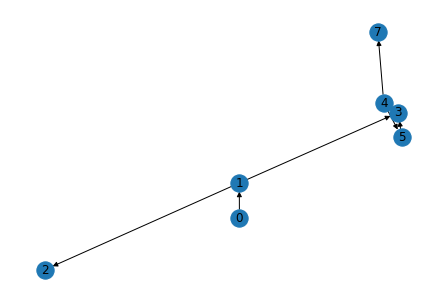

In [83]:
edges = [[0,1,10],
        [1,2,20],
        [1,3,30],
        [3,4,40],
        [4,7,50],
        [4,5,60],
        [5,3,70]]

G1 = nx.DiGraph()
G1.add_weighted_edges_from(edges)
nx.draw(G1,with_labels = True)



edges = [(0, 1), (1, 2), (1, 3), (4, 7), (4, 5), (5, 3)]


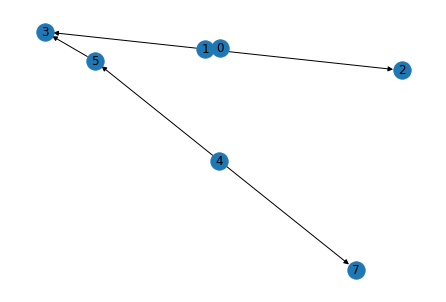

In [132]:
G2 = xu.query_to_subgraph(G1,
                         "(weight<40) or (u>=5)",
                         make_bidirectional_query=True,
                         verbose = False)

nx.draw(G2,with_labels=True)